# Model Run Examples and Output Notebook

Let's start with two basic model simulations; one using [ABIFM](https://pubs.rsc.org/en/content/articlehtml/2013/fd/c3fd00035d), and the other using a singular approach (by default, the [DeMott et al. (2010)](https://www.pnas.org/content/107/25/11217) size-dependent parametrization). The model input, simulation, and output are received, performed, and provided in SI units, so when specifying the input, we should remain consistent with this approach (by default). Each model simulation is initialized with a single monomodal aerosol population with arbitrary parameter values (diameter of $10^{-6}$ $m$ (1 micrometer); $N_{aer}\ =\ 2\cdot 10^{3}\ m^{-3}$). Throughout the simulation, we use a single profile from the LES output (3 $h$; after the simulation reached a steady-state).

In [1]:
from init_model import ci_model
import numpy as np

# ABIFM
model_abifm = ci_model(use_ABIFM=True,
                       deplete_entrained=False,
                       aer_info=[{"name": "Desert_Dust",
                                  "n_init_max": 2.0e3,
                                  "psd": {"type": "mono",
                                          "diam": 1.0e-6},                            
                                  "nucleus_type": "Desert Dust"}],
                       t_harvest=3600*3)

# Singular
model_singular = ci_model(use_ABIFM=False,
                          deplete_entrained=False,
                          aer_info=[{"name": "Desert_Dust", 
                                     "n_init_max": 2.0e3,
                                     "psd": {"type": "mono",
                                             "diam": 1.0e-6},                            
                                     "nucleus_type": "Desert Dust"}],
                          t_harvest=3600*3) 

Model initalization done! Total processing time = 0.875653 s
10% of model run completed. Elapsed time: 0.58 s.
20% of model run completed. Elapsed time: 1.16 s.
30% of model run completed. Elapsed time: 1.74 s.
40% of model run completed. Elapsed time: 2.32 s.
50% of model run completed. Elapsed time: 2.90 s.
60% of model run completed. Elapsed time: 3.48 s.
70% of model run completed. Elapsed time: 4.06 s.
80% of model run completed. Elapsed time: 4.63 s.
90% of model run completed. Elapsed time: 5.21 s.

Model run finished! Total run time = 5.808107 s
Model run time stats:
Process: activation_aer: 0.77 s (13.33% of of total time)
Process: entrainment_aer: 0.50 s (8.66% of of total time)
Process: mixing_aer: 0.61 s (10.58% of of total time)
Process: sedimentation_ice: 0.50 s (8.54% of of total time)
Process: mixing_ice: 0.48 s (8.27% of of total time)
Process: data_allocation: 2.91 s (50.09% of of total time)


Model initalization done! Total processing time = 0.771569 s
10% of model 

Now, we can use the internal _ci_model_ object (or xarray) to generate some plots, in the example below nucleated ice time-height curtains and profile mean time series.

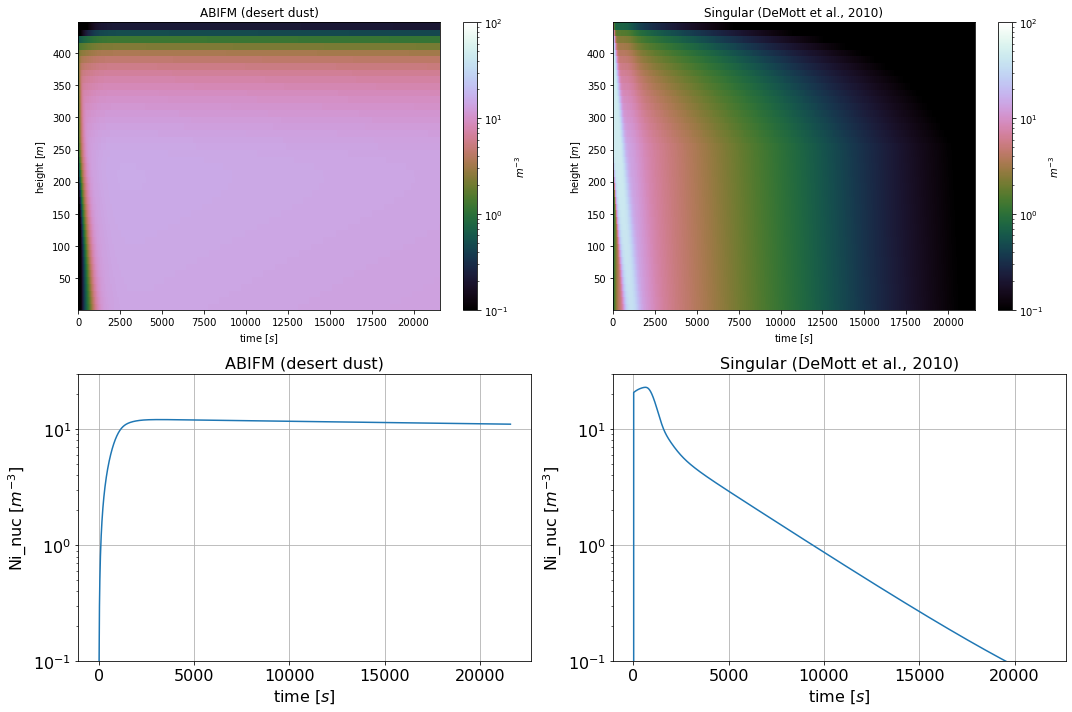

In [2]:
cb = {}
fig, ax = model_abifm.generate_figure(subplot_shape=(2,2))
ax[0,0], cb["sub0"] = model_abifm.plot_curtain(ax=ax[0,0], field_to_plot="Ni_nuc", vmin=1e-1, vmax=1e2, log_plot=True, title="ABIFM (desert dust)")
ax[0,1], cb["sub1"] = model_singular.plot_curtain(ax=ax[0,1], field_to_plot="Ni_nuc", vmin=1e-1, vmax=1e2, log_plot=True, title="Singular (DeMott et al., 2010)")
ax[1,0] = model_abifm.plot_tseries(ax=ax[1,0], field_to_plot="Ni_nuc", grid=True, yscale="log", ylim=[1e-1, 3e1], title="ABIFM (desert dust)")
ax[1,1] = model_singular.plot_tseries(ax=ax[1,1], field_to_plot="Ni_nuc", grid=True, yscale="log", ylim=[1e-1, 3e1], title="Singular (DeMott et al., 2010)")

To some, it is more convenient to specify the aerosol input parameters (diameters and concentrations) in non-SI units such as $\mu m$ and $L^{-1}$. If one wishes to use this feature, then the input concentration and/or diameter units need to be specified using the 'input_conc_units' and 'input_diam_units' keywords, respectively, as demonstrated below. In this case, unit conversion is performed during model initialization using the [pint](https://pint.readthedocs.io/en/stable/) unit conversion Python package (see [pint's documentation](https://github.com/hgrecco/pint/blob/master/pint/default_en.txt) for full list of acceptable string formats and units), but the model still runs and provides output in SI units (a message describing the conversion procedures is printed on the screen). Note that the output plots below are identical to those shown above because model initialization is practically identical.

'n_init_max' (in aer_info) was input in L^{-1} units; now converted to m^{-3} (SI)
'diam' (in aer_info's 'psd' keys) was input in um units; now converted to m (SI)
Model initalization done! Total processing time = 0.771855 s
10% of model run completed. Elapsed time: 0.58 s.
20% of model run completed. Elapsed time: 1.16 s.
30% of model run completed. Elapsed time: 1.75 s.
40% of model run completed. Elapsed time: 2.35 s.
50% of model run completed. Elapsed time: 2.94 s.
60% of model run completed. Elapsed time: 3.53 s.
70% of model run completed. Elapsed time: 4.12 s.
80% of model run completed. Elapsed time: 4.70 s.
90% of model run completed. Elapsed time: 5.28 s.

Model run finished! Total run time = 5.891086 s
Model run time stats:
Process: activation_aer: 0.79 s (13.44% of of total time)
Process: entrainment_aer: 0.51 s (8.66% of of total time)
Process: mixing_aer: 0.62 s (10.58% of of total time)
Process: sedimentation_ice: 0.50 s (8.55% of of total time)
Process: mixing_ice: 0.4

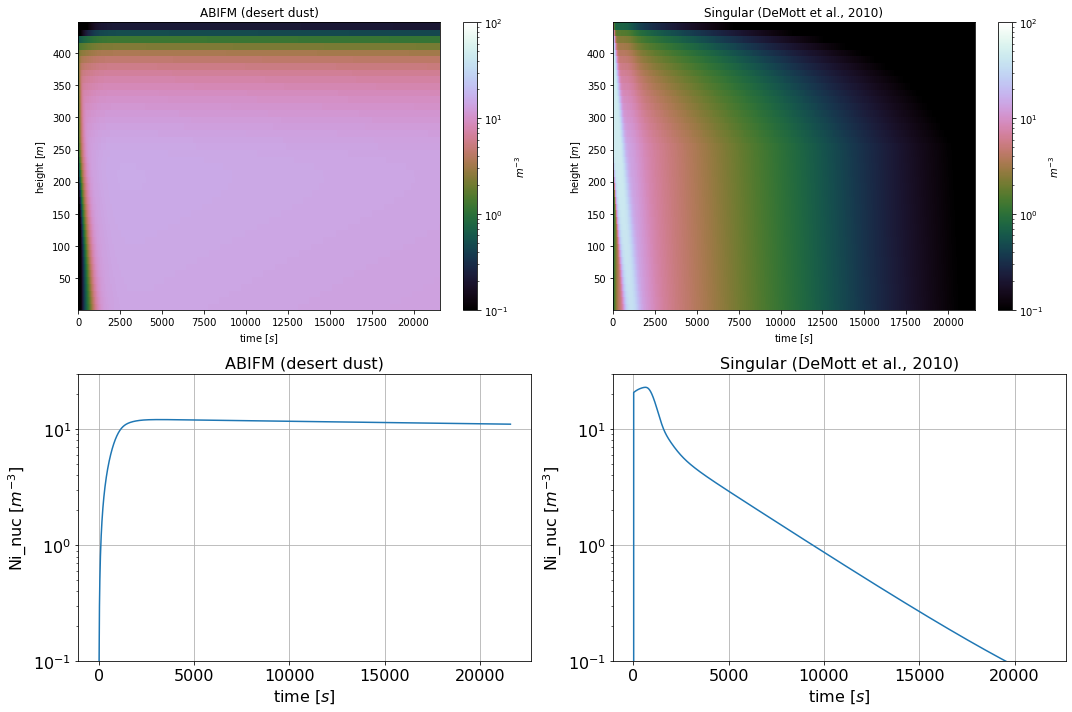

In [3]:
from init_model import ci_model
import numpy as np

# ABIFM
model_abifm_nonSI_in = ci_model(use_ABIFM=True,
                                aer_info=[{"name": "Desert_Dust",
                                           "n_init_max": 2.,  # L^-1
                                           "psd": {"type": "mono",
                                                   "diam": 1.},  # um                      
                                           "nucleus_type": "Desert Dust"}],
                                input_conc_units="L^{-1}",
                                input_diam_units="um",
                                t_harvest=3600*3)

# Singular
model_singular_nonSI_in = ci_model(use_ABIFM=False,
                                   aer_info=[{"name": "Desert_Dust", 
                                              "n_init_max": 2.,  # L^-1
                                              "psd": {"type": "mono",
                                                      "diam": 1.},     # um                         
                                              "nucleus_type": "Desert Dust"}],
                                   input_conc_units="L^{-1}",
                                   input_diam_units="um",
                                   t_harvest=3600*3) 

# Plotting
_, ax = model_abifm_nonSI_in.generate_figure(subplot_shape=(2,2))
model_abifm_nonSI_in.plot_curtain(ax=ax[0,0], field_to_plot="Ni_nuc", vmin=1e-1, vmax=1e2, log_plot=True, title="ABIFM (desert dust)")
model_singular_nonSI_in.plot_curtain(ax=ax[0,1], field_to_plot="Ni_nuc", vmin=1e-1, vmax=1e2, log_plot=True, title="Singular (DeMott et al., 2010)")
model_abifm_nonSI_in.plot_tseries(ax=ax[1,0], field_to_plot="Ni_nuc", grid=True, yscale="log", ylim=[1e-1, 3e1], title="ABIFM (desert dust)")
model_singular_nonSI_in.plot_tseries(ax=ax[1,1], field_to_plot="Ni_nuc", grid=True, yscale="log", ylim=[1e-1, 3e1], title="Singular (DeMott et al., 2010)")

It is occasionally also more convenient to examine and/or plot the model output data in units such as $L^{-1}$ for concentrations or $cm^{-2} s^{-1}$ for Jhet. We can easily convert all of the ci_model object's output fields using the ci_model class internal methods, which also take advantage of 'pint'. Moreover, we can change the coordinates (height, time, diameter, temperature) associated with the different output variables to more convenient units as well, for example, time in hours. When called, each of these methods informs us about the unit conversions that were made and the fields on which they were applied (as also performed in the '_swap_diam_dim_to_from_um', '_swap_height_dim_to_from_km', and '_swap_T_dim_to_from_C' internal unit conversion methods). Note that we changed the vmin, vmax, and ylim input parameters accordingly when calling the internal plotting methods (these ranges are set automatically if not explicitly specified).

The units of 'Ni' converted from $m^{-3}$ to L^{-1}
The units of 'Ni_nuc' converted from $m^{-3}$ to L^{-1}
The units of 'dn_dlogD' in the 'Desert_Dust' popolation converted from $m^{-3}$ to L^{-1}
The units of 'n_aer' in the 'Desert_Dust' popolation converted from $m^{-3}$ to L^{-1}
The units of 'Ni' converted from $m^{-3}$ to L^{-1}
The units of 'Ni_nuc' converted from $m^{-3}$ to L^{-1}
The units of 'dn_dlogD' in the 'Desert_Dust' popolation converted from $m^{-3}$ to L^{-1}
The units of 'inp' in the 'Desert_Dust' popolation converted from $m^{-3}$ to L^{-1}
The units of 'Jhet' in the 'Desert_Dust' popolation converted from $m^{-2} s^{-1}$ to cm^{-2} s^{-1}
Converting time dimension units from seconds to hours
Converting time dimension units from seconds to hours


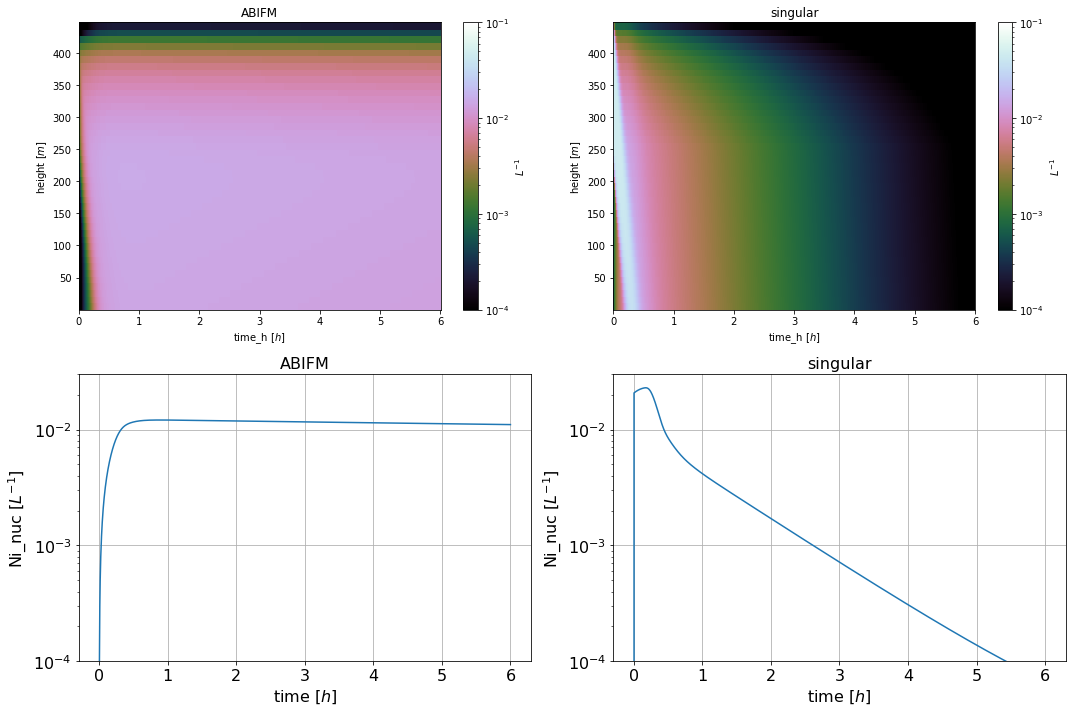

In [4]:
model_abifm._convert_quantity_units("L^{-1}")
model_singular._convert_quantity_units("L^{-1}")
model_abifm._convert_quantity_units("cm^{-2} s^{-1}")
model_abifm._swap_time_dim_to_from_hr()
model_singular._swap_time_dim_to_from_hr()

cb = {}
xticks = np.linspace(0, 2, 2)
fig, ax = model_abifm.generate_figure(subplot_shape=(2,2))
ax[0,0], cb["sub0"] = model_abifm.plot_curtain(ax=ax[0,0], field_to_plot="Ni_nuc", vmin=1e-4, vmax=1e-1, log_plot=True, title="ABIFM")
ax[0,1], cb["sub1"] = model_singular.plot_curtain(ax=ax[0,1], field_to_plot="Ni_nuc", vmin=1e-4, vmax=1e-1, log_plot=True, title="singular")
ax[1,0] = model_abifm.plot_tseries(ax=ax[1,0], field_to_plot="Ni_nuc", grid=True, yscale="log", ylim=[1e-4, 3e-2], title="ABIFM")
ax[1,1] = model_singular.plot_tseries(ax=ax[1,1], field_to_plot="Ni_nuc", grid=True, yscale="log", ylim=[1e-4, 3e-2], title="singular")

Let's see the output fields in our model i/o xr.Dataset. Note that all concentration fields do not have now the default SI units of $m^{-3}$ but $L^{-1}$ instead, and that the 'time_h' coordinate representing the simulation time in hours serves as one of the ci_model object xr.Dataset's dimensions (designated by the **bold** font).

In [5]:
model_abifm.ds

Magnitude,[10.416666030883789 10.416667938232422 10.416667938232422 10.416664123535156 10.416667938232422 10.416667938232422 10.416664123535156 10.416671752929688 10.416664123535156 10.416664123535156 10.416671752929688 10.416671752929688 10.416656494140625 10.416671752929688 10.416671752929688 10.416656494140625 10.416671752929688 10.416671752929688 10.416656494140625 10.416671752929688 10.416671752929688 10.416656494140625 10.416671752929688 10.416671752929688 10.416656494140625 10.41668701171875 10.416656494140625 10.416656494140625 10.41668701171875 10.416656494140625 10.416656494140625 10.41668701171875 10.416656494140625 10.416656494140625 10.41668701171875 10.416656494140625 10.416656494140625 10.41668701171875 10.416656494140625 10.416656494140625 10.41668701171875 10.416656494140625 10.416656494140625]
Units,meter
Magnitude,[[0.8398463439941406 0.8398463439941406 0.8398463439941406 ... 0.8398463439941406 0.8398463439941406 0.8398463439941406] [0.8453170776367188 0.8453170776367188 0.8453170776367188 ... 0.8453170776367188 0.8453170776367188 0.8453170776367188] [0.8506898498535156 0.8506898498535156 0.8506898498535156 ... 0.8506898498535156 0.8506898498535156 0.8506898498535156] ... [0.995068359375 0.995068359375 0.995068359375 ... 0.995068359375 0.995068359375 0.995068359375] [0.9571499633789062 0.9571499633789062 0.9571499633789062 ... 0.9571499633789062 0.9571499633789062 0.9571499633789062] [0.8328614807128907 0.8328614807128907 0.8328614807128907 ... 0.8328614807128907 0.8328614807128907 0.8328614807128907]]
Units,dimensionless
Magnitude,[[3.337098375411074e-10 3.337098375411074e-10 3.337098375411074e-10 ... 3.337098375411074e-10 3.337098375411074e-10 3.337098375411074e-10] [3.854501995359527e-10 3.854501995359527e-10 3.854501995359527e-10 ... 3.854501995359527e-10 3.854501995359527e-10 3.854501995359527e-10] [4.3749548428451135e-10 4.3749548428451135e-10 4.3749548428451135e-10 ... 4.3749548428451135e-10 4.3749548428451135e-10 4.3749548428451135e-10] ... [4.012322460766882e-05 4.012322460766882e-05 4.012322460766882e-05 ... 4.012322460766882e-05 4.012322460766882e-05 4.012322460766882e-05] [1.334254557150416e-05 1.334254557150416e-05 1.334254557150416e-05 ... 1.334254557150416e-05 1.334254557150416e-05 1.334254557150416e-05] [1.1226213700865628e-06 1.1226213700865628e-06 1.1226213700865628e-06 ... 1.1226213700865628e-06 1.1226213700865628e-06 1.1226213700865628e-06]]
Units,dimensionless
Magnitude,[[256.7962951660156 256.7962951660156 256.7962951660156 ... 256.7962951660156 256.7962951660156 256.7962951660156] [256.68988037109375 256.68988037109375 256.68988037109375 ... 256.68988037109375 256.68988037109375 256.68988037109375] [256.5662841796875 256.5662841796875 256.5662841796875 ... 256.5662841796875 256.5662841796875 256.5662841796875] ... [253.245361328125 253.245361328125 253.245361328125 ... 253.245361328125 253.245361328125 253.245361328125] [253.87742614746094 253.87742614746094 253.87742614746094 ... 253.87742614746094 253.87742614746094 253.87742614746094] [255.34278869628906 255.34278869628906 255.34278869628906 ... 255.34278869628906 255.34278869628906 255.34278869628906]]
Units,kelvin
Magnitude,[[0.021639027181663554 0.021639027181663554 0.021639027181663554 ... 0.021639027181663554 0.021639027181663554 0.021639027181663554] [0.02199174559791573 0.02199174559791573 0.02199174559791573 ... 0.02199174559791573 0.02199174559791573 0.02199174559791573] [0.02232477345387452 0.02232477345387452 0.02232477345387452 ... 0.02232477345387452 0.02232477345387452 0.02232477345387452] ... [0.004845116563956254 0.004845116563956254 0.004845116563956254 ... 0.004845116563956254 0.004845116563956254 0.004845116563956254] [0.0026504619654588173 0.0026504619654588173 0.0026504619654588173 ... 0.0026504619654588173 0.0026504619654588173 0.0026504619654588173] [0.0006756703214705341 0.0006756703214705341 0.0006756703214705341 ... 0.0006756703214705341 0.0006756703214705341 0.0006756703214705341]]
Units,1/liter
Magnitude,

To examine the aerosol dataset we need to specify the population name (that way, we can call an xr.Dataset of each INP populationin, in the case of multiple INP populations). Let's examine the difference in aerosol xr.Dataset fields for ABIFM and singular. Note that some differences in the singular output fields exist when using an INAS parameterization (e.g., using the 'ND2012' string representing the [Niemand et al., 2012](https://journals.ametsoc.org/view/journals/atsc/69/10/jas-d-11-0249.1.xml) parameterization). It should also be noted that nucleus type specification is not required in the singular approach).

In [6]:
model_abifm.aer["Desert_Dust"].ds

Magnitude,[2.0000000000000004]
Units,1/liter
Magnitude,[3.141592653589793e-12]
Units,meter2
Magnitude,[[0.02296905017800099 0.02296905017800099 0.02296905017800099 ... 0.02296905017800099 0.02296905017800099 0.02296905017800099] [0.03198745811611638 0.03198745811611638 0.03198745811611638 ... 0.03198745811611638 0.03198745811611638 0.03198745811611638] [0.044649682384072284 0.044649682384072284 0.044649682384072284 ... 0.044649682384072284 0.044649682384072284 0.044649682384072284] ... [340.05517998004154 340.05517998004154 340.05517998004154 ... 340.05517998004154 340.05517998004154 340.05517998004154] [36.153856587831136 36.153856587831136 36.153856587831136 ... 36.153856587831136 36.153856587831136 36.153856587831136] [0.029906707647358463 0.029906707647358463 0.029906707647358463 ... 0.029906707647358463 0.029906707647358463 0.029906707647358463]]
Units,1/(centimeter2 second)
Magnitude,[[7.215939929914324e-07 7.215939929914324e-07 7.215939929914324e-07 ... 7.215939929914324e-07 7.215939929914324e-07 7.215939929914324e-07] [1.0049156342460242e-06 1.0049156342460242e-06 1.0049156342460242e-06 ... 1.0049156342460242e-06 1.0049156342460242e-06 1.0049156342460242e-06] [1.402711141629191e-06 1.402711141629191e-06 1.402711141629191e-06 ... 1.402711141629191e-06 1.402711141629191e-06 1.402711141629191e-06] ... [0.010683148552404535 0.010683148552404535 0.010683148552404535 ... 0.010683148552404535 0.010683148552404535 0.010683148552404535] [0.0011358069025526924 0.0011358069025526924 0.0011358069025526924 ... 0.0011358069025526924 0.0011358069025526924 0.0011358069025526924] [9.395469303799904e-07 9.395469303799904e-07 9.395469303799904e-07 ... 9.395469303799904e-07 9.395469303799904e-07 9.395469303799904e-07]]
Units,percent
Magnitude,[[[2.0000000000000004] [1.999999428456786] [1.999998302962012] ... [1.8133863919978503] [1.8132969075612226] [1.8132074277560712]] [[2.0000000000000004] [1.9999994228218332] [1.9999982917234138] ... [1.8133854641095073] [1.8132959797186508] [1.8132064999592685]] [[2.0000000000000004] [1.9999994149101226] [1.9999982759439487] ... [1.8133841613168267] [1.8132946769902354] [1.8132051972951146]] ... [[2.0000000000000004] [1.9997869668539463] [1.9995745827307776] ... [1.7790631983673009] [1.7789754072766912] [1.7788876207361852]] [[2.0000000000000004] [1.9999768528712045] [1.9999532774722113] ... [1.8096765504180234] [1.8095872489850968] [1.809497952174974]] [[2.0000000000000004] [1.999999424123738] [1.9999982943749672] ... [1.8162683139621274] [1.8161803551610078] [1.816092400912933]]]
Units,1/liter


In [7]:
model_singular.aer["Desert_Dust"].ds

<xarray.Dataset>
Dimensions:    (T: 46, diam: 1, height: 43, time_h: 2161)
Coordinates:
  * T          (T) float64 253.0 253.1 253.2 253.3 ... 266.5 267.3 268.1 269.0
  * height     (height) float32 5.208 15.62 26.04 36.46 ... 421.9 432.3 442.7
    time       (time_h) int64 0 10 20 30 40 50 ... 21560 21570 21580 21590 21600
  * diam       (diam) float64 1e-06
    T_C        (T) float64 -20.15 -20.05 -19.94 -19.83 ... -5.851 -5.036 -4.18
    height_km  (height) float32 0.005208 0.01562 0.02604 ... 0.4323 0.4427
  * time_h     (time_h) float64 0.0 0.002778 0.005556 ... 5.994 5.997 6.0
    diam_um    (diam) float64 1.0
Data variables:
    dn_dlogD   (diam) float64 <Quantity([2.], '1 / liter')>
    surf_area  (diam) float64 <Quantity([3.14159265e-12], 'meter ** 2')>
    ns_raw     (height, time_h) float64 <Quantity([[0.00000000e+00 0.00000000...
    inp        (height, time_h, T) float64 <Quantity([[[7.16660250e-06 1.1711...
    inp_pct    (height, time_h) float64 <Quantity([[0.         0.         0. ...

When using ABIFM, we can see below how to print the ABIFM coefficient for a given aerosol population and where ABIFM coefficient tables are stored:

In [8]:
print("m = %f, c = %f" % (model_abifm.aer["Desert_Dust"].Jhet.m, model_abifm.aer["Desert_Dust"].Jhet.c))
model_abifm.aer["Desert_Dust"].Jhet.Jhet_coeff_table

m = 22.620000, c = -1.350000


,c,sigma_c,LCL_c,UCL_c,m,sigma_m,LCL_m,UCL_m
nucleus_type,,,,,,,,
Ice nucleus,c,sigma_c,LCL_c,UCL_c,m,sigma_m,LCL_m,UCL_m
N. atomus,-17.12381,0.27733,-17.66751,-16.5801,83.95603,1.17979,81.64302,86.26904
T. pseudonana,-10.4345,0.17629,-10.78012,-10.08889,59.66992,0.79104,58.11905,61.22079
Pahokee Peat,-15.77884,0.18337,-16.13839,-15.41929,78.30951,0.79777,76.74529,79.87374
Leonardite,-13.40148,0.09931,-13.59621,-13.20675,66.90259,0.42911,66.06118,67.744
Illite,-10.66873,0.07544,-10.81666,-10.5208,54.48075,0.33316,53.8275,55.134
1-Nonadecanol,-2.92414,0.04322,-3.00894,-2.83934,28.13797,0.35129,27.44871,28.82723
Kaolinite,-10.54758,0.38782,-11.31377,-9.7814,54.58834,1.39323,51.8359,57.34078
Al2O3,1.60671,0.58271,0.34784,2.86558,14.96639,2.14742,10.32717,19.6056


As mentioned above, we can also use xarray to examine the model output. While we can still use the two model objects from above, let us initialize two additional simulations using the model's default PSD ($D_{mean}\ =\ 1\ \mu m$, SD = 2.5, 35 PSD bins, $D_{min}\ =\ 0.01\ \mu m$, and bin mass ratio of 2). Here, we use 6 h long model run (note that run_model=False so the model only initializes). in the first simulation, the LES sounding we use represents the simulation mean between 3-6 h (after steady state), while in the second we inform the model with the full (un-averaged) prognosed LES output. Note that ABIFM, LES output temporal averaging, and the PSD parameters are all used by default, so these can be specified when calling the model, but are not required in this case. Note that in both simulations we specified the mixing layer as only occurring within cloud boundaries (see figures below).

In [9]:
from init_model import ci_model

# Average LES in time
model_def = ci_model(final_t=3600*6,                           # 1D model simulation time
                 mixing_bounds=("ql_thresh", "ql_thresh"),     # Mixing layer bounds (base, top) in m ("ql_thresh" for cloud base/top)
                 aer_info=[{"name": "DesertDust_default",      # Aerosol population properties
                            "n_init_max": 1.5,
                            "psd": {"type": "default"},                            
                            "nucleus_type": "Desert Dust"}
                          ],
                 t_harvest=(3600*3, 3600*6),                   # time(s) to harvest from the LES model output 
                 run_model=False)

# Use full LES output to inform the model
model_def_no_les_ave =   ci_model(final_t=3600*6,                      # 1D model simulation time
                         mixing_bounds=("ql_thresh", "ql_thresh"),     # Mixing layer bounds (base, top) in m ("ql_thresh" for cloud base/top)
                         t_averaged_les=False,                         # True - time-averaged LES, False - LES evolution informs 1d model
                         aer_info=[{"name": "DesertDust_default",      # Aerosol population #4 properties
                                    "n_init_max": 1.5,
                                    "psd": {"type": "default"},                            
                                    "nucleus_type": "Desert Dust"}
                                  ],
                         t_harvest=(0, 3600*6),                        # time(s) to harvest from the LES model output 
                         run_model=False)

Model initalization done! Total processing time = 2.412551 s
Model initalization done! Total processing time = 3.035274 s


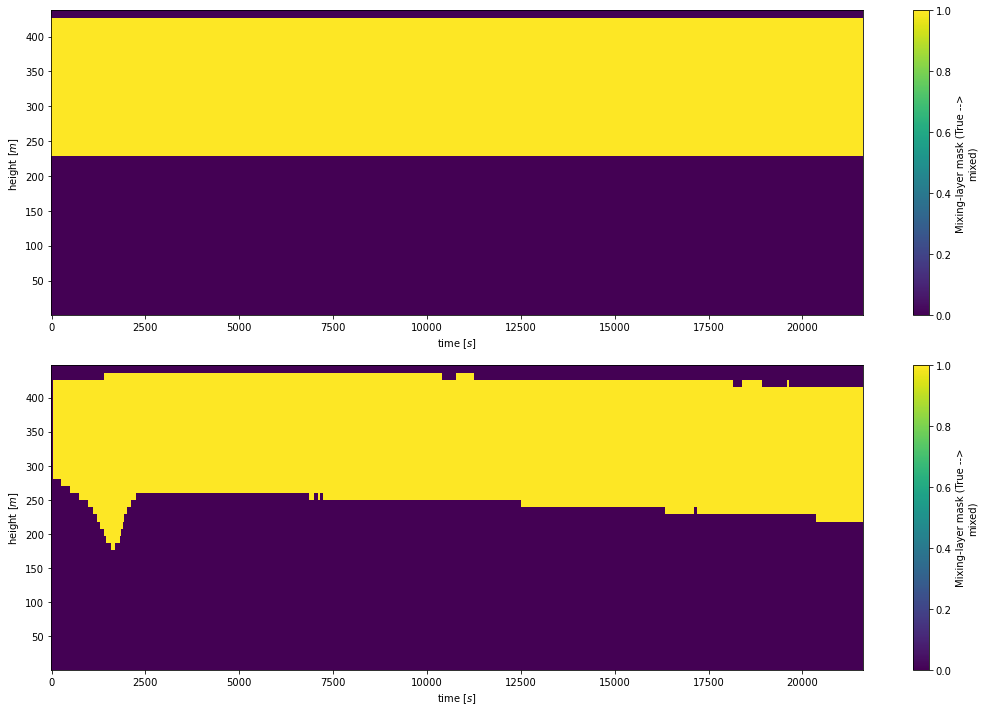

In [10]:
fig, ax = model_def_no_les_ave.generate_figure(subplot_shape=(2,1))
model_def.ds["mixing_mask"].plot(ax=ax[0])
model_def_no_les_ave.ds["mixing_mask"].plot(ax=ax[1])
fig.tight_layout()

The simulation below shows all model input options and capabilities of handling multiple aerosol populations that can be weighted vertically (introducing aerosol layers). Note that if weights larger than 1 are specified, the weight profile is normalized to have a maximum value of 1 (a message is printed on the screen to let the user know).
In this simulation we use the full LES output, and specify 5 INP populations of different types (nucleus type, PSD, etc.). 
Here, our mixed layer goes from the surface up to cloud top and note that we use again the option of specifying the input parameters in non-SI units.

In [11]:
from init_model import ci_model
import numpy as np

model = ci_model(final_t=3600*4,                               # 1D model simulation time
                 delta_t=10,                                   # ∆t in s
                 use_ABIFM=True,                               # True - ABIFM, False - singular
                 t_averaged_les=False,                         # True - time-averaged LES, False - LES evolution informs 1d model
                 custom_vert_grid=np.arange(0., 500.+1., 10.), # None - use LES vertical grid, np.ndarray - custom vertical grid
                 w_e_ent=0.1e-3,                               # cloud-top entrainment value or time series
                 mixing_bounds=(0, "ql_thresh"),               # Mixing layer bounds (base, top) in m ("ql_thresh" for cloud base/top)
                 deplete_entrained=True,                       # True - deplete aerosol from top, False -infinite (subsidising) entrainment source
                 tau_mix=1800.,                                # Mixing time scale value or time series
                 v_f_ice=0.3,                                  # number-weighted fall velocity (value, t-series, or curtain)
                 in_cld_q_thresh=1e-6,                         # mixing ratio threshold for determining a cloud [kg/kg]
                 aer_info=[{"name": "Illite_mono",             # Aerosol population #1 properties
                            "n_init_max": 2.,
                            "psd": {"type": "mono",
                                   "diam": 1.},                            
                            "nucleus_type": "Illite",
                            "n_init_weight_prof":
                            {"height": np.array([0, 100, 150, 200, 500]),
                            "weight": np.array([0.8, 1., 1., 0.2, 0.1])}},
                           {"name": "Kaolinite",               # Aerosol population #2 properties
                            "n_init_max": 1.5,
                            "psd": {"type": "logn",
                                    "diam_mean": 0.8,
                                    "geom_sd": 1.5,
                                    "n_bins": 40,
                                    "diam_min": 0.05,
                                    "m_ratio": 1.5},                            
                            "nucleus_type": "Kaolinite"},
                           {"name": "Al2O3_default",            # Aerosol population #3 properties
                            "n_init_max": 1.5,
                            "psd": {"type": "default"},                            
                            "nucleus_type": "Al2O3",
                            "n_init_weight_prof":
                            {"height": np.array([0, 300, 350, 400, 500]),
                            "weight": np.array([0., 0.1, 1.0, 1.0, 0.1])}},
                           {"name": "DesertDust",               # Aerosol population #4 properties
                            "n_init_max": [4329777, 640],
                            "psd": {"type": "multi_logn",
                                    "diam_mean": [0.0744, 2.251],                            
                                    "geom_sd": [1.76, 1.6],
                                    "n_bins": 50,
                                    "diam_min": (0.014, 20),
                                    "m_ratio": 1.5},                           
                            "nucleus_type": "Desert Dust"},
                           {"name": "Al2O3_custom",            # Aerosol population #5 properties
                            "n_init_max": 1,
                            "psd": {"type": "custom",
                                    "diam": [0.1, 0.3, 1., 2., 10.],
                                    "dn_dlogD": [0.2, 0.1, 0.6, 0.1, 0.05],
                                    "norm_to_n_init_max": True},                            
                            "nucleus_type": "Al2O3"}
                            ],
                 les_out_path=None,                            # path of LES output sounding file to inform the model
                 les_out_filename=None,                        # filename of LES sounding file to inform the model
                 t_harvest=(0, 3600*6),                        # time(s) to harvest from the LES model output 
                 height_ind_2crop=600.,                        # height indices or vals for LES cropping ("ql_pbl": use ql thresh)
                 cbh_det_method="ql_thresh",                   # Method to detect cloud base (currently, only with a ql thresh)
                 input_conc_units="L^{-1}",                    # Specify alternative input concentartion units
                 input_diam_units="um",                        # Specify alternative input diameter units
                 do_entrain=True,                              # do entrainment in model run
                 do_mix_aer=True,                              # do aerosol mixing in model run
                 do_mix_ice=True,                              # do ice mixing in model run
                 do_sedim=True,                                # do sedimentation in model run
                 run_model=True)                               # True - run model after initialization

Some heights were omitted because they are outside the processed LES dataset grid
'n_init_max' (in aer_info) was input in L^{-1} units; now converted to m^{-3} (SI)
'n_init_max' (in aer_info) was input in L^{-1} units; now converted to m^{-3} (SI)
'n_init_max' (in aer_info) was input in L^{-1} units; now converted to m^{-3} (SI)
'n_init_max' (in aer_info) was input in L^{-1} units; now converted to m^{-3} (SI)
'n_init_max' (in aer_info) was input in L^{-1} units; now converted to m^{-3} (SI)
'dn_dlogD' (in aer_info's 'psd' keys) was input in L^{-1} units; now converted to m^{-3} (SI)
'diam' (in aer_info's 'psd' keys) was input in um units; now converted to m (SI)
'diam_mean' (in aer_info's 'psd' keys) was input in um units; now converted to m (SI)
'diam_min' (in aer_info's 'psd' keys) was input in um units; now converted to m (SI)
'diam_mean' (in aer_info's 'psd' keys) was input in um units; now converted to m (SI)
'diam_min' (in aer_info's 'psd' keys) was input in um units; now conver

Let's plot curtain plots of the model output for the INP population we named: "Al2O3_default" (again, we convert the output units and some coordinates for convenience; note that requested coordinate values were adjusted accordignly). Here, we show the population's Jhet (depends on nucleus type and RH + T from the LES), temporal evolution of the INP PSD at an altitude of 400 m (in-cloud), and the PSD profiles at initialization (t = 0 s) and 1 h into the simulation. Note the layer structure of the population at initialization as we used vertical weighting).

The units of 'Ni' converted from $L^{-1}$ to L^{-1}
The units of 'Ni_nuc' converted from $L^{-1}$ to L^{-1}
The units of 'dn_dlogD' in the 'Illite_mono' popolation converted from $L^{-1}$ to L^{-1}
The units of 'n_aer' in the 'Illite_mono' popolation converted from $L^{-1}$ to L^{-1}
The units of 'dn_dlogD' in the 'Kaolinite' popolation converted from $L^{-1}$ to L^{-1}
The units of 'n_aer' in the 'Kaolinite' popolation converted from $L^{-1}$ to L^{-1}
The units of 'dn_dlogD' in the 'Al2O3_default' popolation converted from $L^{-1}$ to L^{-1}
The units of 'n_aer' in the 'Al2O3_default' popolation converted from $L^{-1}$ to L^{-1}
The units of 'dn_dlogD' in the 'DesertDust' popolation converted from $L^{-1}$ to L^{-1}
The units of 'n_aer' in the 'DesertDust' popolation converted from $L^{-1}$ to L^{-1}
The units of 'dn_dlogD' in the 'Al2O3_custom' popolation converted from $L^{-1}$ to L^{-1}
The units of 'n_aer' in the 'Al2O3_custom' popolation converted from $L^{-1}$ to L^{-1}
The uni

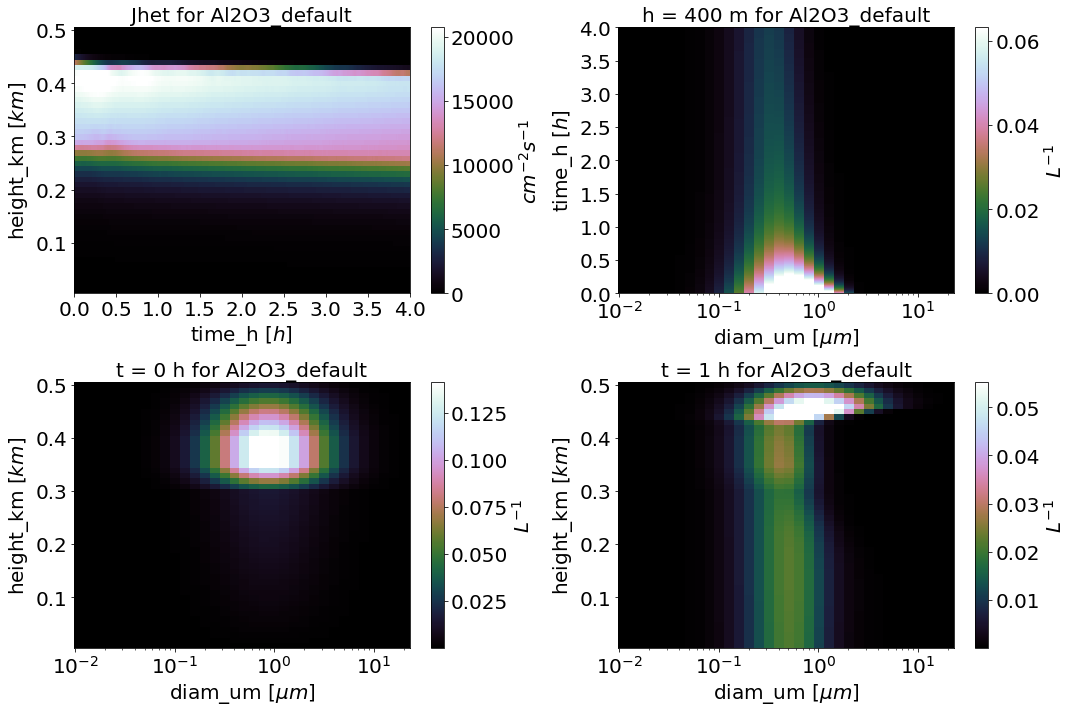

In [14]:
model._convert_quantity_units("L^{-1}")
model._convert_quantity_units("L^{-1}")
model._convert_quantity_units("cm^{-2} s^{-1}")
model._swap_time_dim_to_from_hr()
model._swap_height_dim_to_from_km()
model._swap_diam_dim_to_from_um()

cb = {}
fig, ax = model.generate_figure(subplot_shape=(2,2))
ax[0,0], cb["sub0"] = model.plot_curtain(ax=ax[0,0], which_pop="Al2O3_default", field_to_plot="Jhet", font_size=20, vmin=0, title="Jhet for Al2O3_default")
ax[0,1], cb["sub1"] = model.plot_curtain(ax=ax[0,1], which_pop="Al2O3_default", font_size=20, x=model.diam_dim, y=model.time_dim, aer_z=0.4, title="h = 400 m for Al2O3_default")
ax[1,0], cb["sub2"] = model.plot_curtain(ax=ax[1,0], which_pop="Al2O3_default", font_size=20, x=model.diam_dim, aer_z=0., title="t = 0 h for Al2O3_default")
ax[1,1], cb["sub3"] = model.plot_curtain(ax=ax[1,1], which_pop="Al2O3_default", font_size=20, x=model.diam_dim, aer_z=1.,xscale="log", title="t = 1 h for Al2O3_default")

We can also produce time series of different variables at specific heights, for example (note that here we customize the plots by specifying the x-axis label, xticks, and xlim input parameters available, among other optional parameters, in the internal plotting methods).

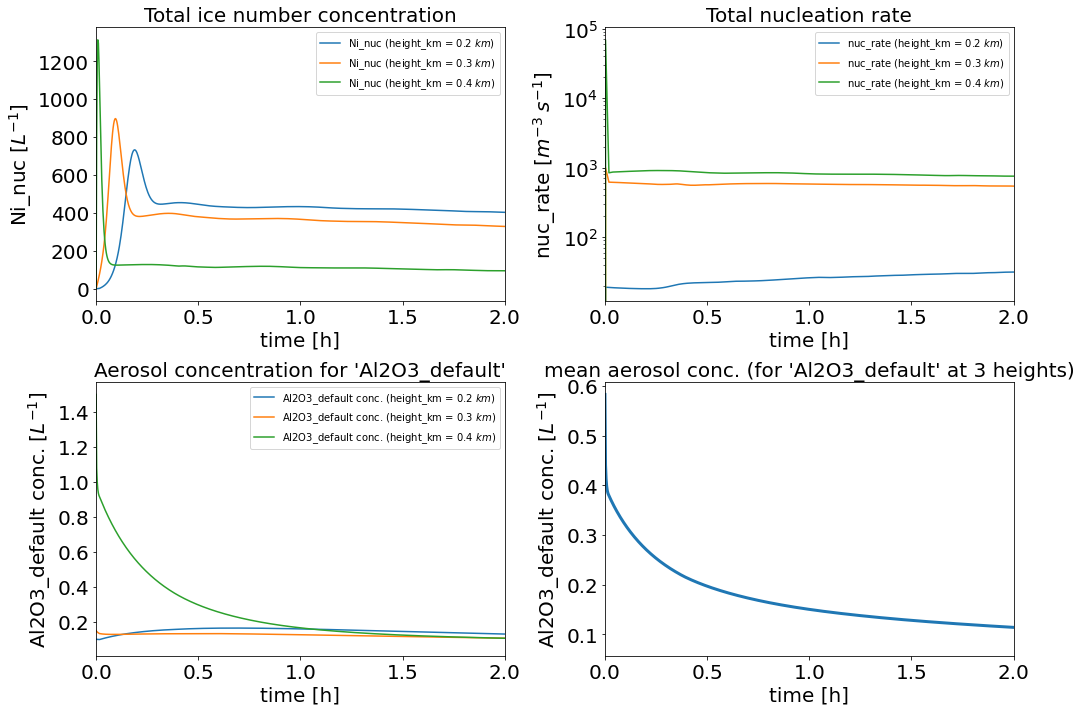

In [15]:
xticks = np.linspace(0, 2, 5)
XLim = [0, 2]
Height=[0.2, 0.3, 0.4]
fig, ax = model.generate_figure(subplot_shape=(2,2))
ax[0,0] = model.plot_tseries(ax=ax[0,0], font_size=20, field_to_plot="Ni_nuc", Height=Height, xlabel="time [h]", xtick=xticks, xlim=XLim, Height_dim_treat=None, title="Total ice number concentration")
ax[0,1] = model.plot_tseries(ax=ax[0,1], font_size=20, field_to_plot="nuc_rate", Height=Height, xlabel="time [h]", xtick=xticks, xlim=XLim, yscale="log", Height_dim_treat=None, title="Total nucleation rate")
ax[1,0] = model.plot_tseries(ax=ax[1,0], which_pop="Al2O3_default", Height=Height, font_size=20, xlabel="time [h]", xtick=xticks, xlim=XLim, Height_dim_treat=None, title="Aerosol concentration for 'Al2O3_default'")
ax[1,1] = model.plot_tseries(ax=ax[1,1], which_pop="Al2O3_default", Height=Height, font_size=20, xlabel="time [h]", xtick=xticks, xlim=XLim, linewidth=3, title="mean aerosol conc. (for 'Al2O3_default' at 3 heights)")

Profile plots can also be generated using the internal methods at different times. In the example below to the right, a simulation average profile of total INP concentration for each of the INP populations is shown (note that dn_dlogD is summed over all diameters in each population).

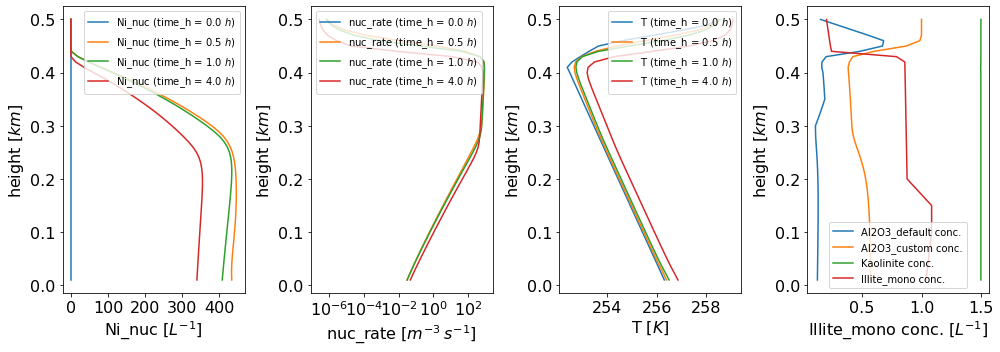

In [16]:
Times = [0., 0.5, 1., 4.]
fig, ax = model.generate_figure(subplot_shape=(1,4), figsize=(14,5))
ax[0] = model.plot_profile(ax=ax[0], field_to_plot="Ni_nuc", Time=Times, Time_dim_treat=None)
ax[1] = model.plot_profile(ax=ax[1], field_to_plot="nuc_rate", xscale="log", Time=Times, Time_dim_treat=None)
ax[2] = model.plot_profile(ax=ax[2], field_to_plot="T", Time=Times, Time_dim_treat=None)
ax[3] = model.plot_profile(ax=ax[3], which_pop="Al2O3_default")
ax[3] = model.plot_profile(ax=ax[3], which_pop="Al2O3_custom")
ax[3] = model.plot_profile(ax=ax[3], which_pop="Kaolinite")
ax[3] = model.plot_profile(ax=ax[3], which_pop="Illite_mono", legend=True)

Finally, let's perform three simulations using the three available approaches (ABIFM, INAS, and singular), and briefly examine their operation. The simualtions are initialized identically (hence we define the input paramters before calling the generation of the ci_model class), and represent real PSD of desert dust (from the SGP site; obviously, these elevated values do not match the Arctic case harvested from the LES).

In [17]:
from init_model import ci_model
import numpy as np

delta_t = 10  # time setp
aer_info = [{"name": "DesertDust",             # INP population #1 properties
             "n_init_max": [4329777e3, 640e3], # SGP 10/15 PM
             "psd": {"type": "multi_logn",
                     "diam_mean": [0.0744e-6, 2.251e-6],                            
                     "geom_sd": [1.76, 1.6],
                     "n_bins": 50,
                     "diam_min": (0.014e-6, 20e-6),
                     "m_ratio": 1.5},
            "nucleus_type": "Desert Dust"}]
t_averaged_les=False
custom_vert_grid=np.arange(0., 500.+1., 10.) # Custom vertical grid with 10 m vertical resolution
height_ind_2crop=600.  # max height to grab from the LES
mixing_bounds=(0, "ql_thresh")  # coupled cloud - mixing from surface to cloud top
t_harvest=(3600, 3600*3)  # starting 1 h after beginning of LES (steady-state)

# ABIFM
abifm_sgp_mix = ci_model(use_ABIFM=True,
                     delta_t=delta_t,
                     t_averaged_les=t_averaged_les,
                     custom_vert_grid=custom_vert_grid,
                     aer_info=aer_info,
                     height_ind_2crop=height_ind_2crop,
                     mixing_bounds=mixing_bounds,
                     t_harvest=t_harvest)

# Singular (DeMott et al., 2015)
singular_sgp_mix = ci_model(use_ABIFM=False,
                     delta_t=delta_t,
                     t_averaged_les=t_averaged_les,
                     custom_vert_grid=custom_vert_grid,
                     aer_info=[{**aer_info[0], **{"singular_fun": "D2015"}}],  # DeMott et al., 2015
                     height_ind_2crop=height_ind_2crop,
                     mixing_bounds=mixing_bounds,
                     t_harvest=t_harvest)

# INAS (Niemand et al., 2012)
inas_sgp_mix = ci_model(use_ABIFM=False,
                     delta_t=delta_t,
                     t_averaged_les=t_averaged_les,
                     custom_vert_grid=custom_vert_grid,
                     aer_info=[{**aer_info[0], **{"singular_fun": "ND2012"}}],  # Niemand et al., 2012
                     height_ind_2crop=height_ind_2crop,
                     mixing_bounds=mixing_bounds,
                     t_harvest=t_harvest)

Some heights were omitted because they are outside the processed LES dataset grid
Model initalization done! Total processing time = 2.782583 s
10% of model run completed. Elapsed time: 0.64 s.
20% of model run completed. Elapsed time: 1.28 s.
30% of model run completed. Elapsed time: 1.91 s.
40% of model run completed. Elapsed time: 2.55 s.
50% of model run completed. Elapsed time: 3.18 s.
60% of model run completed. Elapsed time: 3.82 s.
70% of model run completed. Elapsed time: 4.45 s.
80% of model run completed. Elapsed time: 5.09 s.
90% of model run completed. Elapsed time: 5.72 s.

Model run finished! Total run time = 6.408056 s
Model run time stats:
Process: activation_aer: 0.88 s (13.68% of of total time)
Process: entrainment_aer: 0.51 s (7.90% of of total time)
Process: mixing_aer: 0.93 s (14.54% of of total time)
Process: sedimentation_ice: 0.50 s (7.73% of of total time)
Process: mixing_ice: 0.50 s (7.78% of of total time)
Process: data_allocation: 3.04 s (47.47% of of total 

When using INAS, $n_s(T)$ is first calculated for all the values in the temperature array, determined such that the smallest temperature represents the minimum temeprature over the entire height x time LES model output ($T_{min}$), and the largest temeprature represents a temperature just above -5 C (the array bins are calcualted using an increasing bin width following a geometric progression). INP concentrations are then allocated by multiplying $n_s(T)$ by the surface area of all aerosols per diameter bin and recursively subtracting the sum of $n_s(T > T_i)$ from $n_s(T_i)$, where $i$ designates a temperature bin, such that $\sum_{i=1}^{i=N_T} n_s(T_i)=n_s(T_{min})$, where $N_T$ is the number of temperature bins. The "inp_init" field saves the initial INP height x diameter x time distribution and is shown below for a height of 400 m, where the temperature is very close to $T_{min}$. 
At every time step ($t$) at a given level $h$, all allocated INP associated with $T > T_{LES}(h,t)$ ($T_{LES}(h,t)$ is the temperature harvested from the LES output) are consumed (summed over all temperature bins, resulting in a height x diameter array) and subtracted from the total aerosol concentration array $N_{aer}(h,t,D)$, allowing direct comparison with the $N_{aer}(h,t,D)$ array from ABIFM, while maintaining full consistency with the aerosol surface area and temperature dependencies of the INAS $n_s$ approach.

/home/meteo/ixs34/.conda/envs/emc2/lib/python3.7/site-packages/xarray/core/variable.py:262: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  data = data.get() if isinstance(data, cupy_array_type) else np.asarray(data)


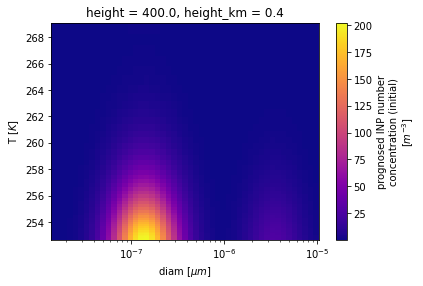

In [18]:
inas_sgp_mix.aer["DesertDust"].ds["inp_init"].sel({"height": 400.}, method="nearest").plot(x="diam",xscale="log", cmap="plasma")